(tactical)=
# Tactical

The idea of dismantling the military-industrial complex and embracing pacifism, however romantic, is a naïve delusion born from a failure to understand the fundamental structure of civilization. This isn’t a modern insight; it’s embedded in the very architecture of Raphael’s *The School of Athens*. Amidst the chaos and confusion of philosophers and scientists—those brilliant, restless minds grappling with the mechanics of existence—stand two immutable pillars: Apollo and Athena. On the left, Apollo represents the cooperative ideal, the pastoral dream of harmony and beauty, while on the right, Athena stands with her shield and spear. Together, they symbolize the necessary extremes: the aspiration toward peace and the ever-present readiness for war.

It is no accident that the civilization envisioned in *The School of Athens* demands both. Apollo's dreams cannot materialize in a world unprotected by Athena’s vigilance. Shield and spear: defense and offense. The shield represents the essential protection of a civilization’s integrity, while the spear signifies the capacity to act decisively when necessary. Without the shield, the dreamers fall to chaos; without the spear, the defenders become irrelevant.

<iframe src="https://www.youtube.com/embed/hvSl_pJF8FE?start=1500" style="width:100%;height:500px;"></iframe>

```{figure} figures/blanche.png
---
width: 1 
height: 1 
---
_Woody Allen Philosophy_. If you've addressed all the green nodes (you've wealth to cover your descendants for millenia), then what next? Worry about "losing all this stuff" once you die. And so philosophy is key among those who have no immediate survival issues. Woody says he exagerates little bits of his personality in his movies to make his characters interesting. Life imitates bad television, not art. 
```

In the context of the United States, the post-World War II embrace of the military-industrial complex isn’t an anomaly but a recognition of this eternal balance. President Dwight D. Eisenhower, for all his concerns about the unchecked growth of this complex, understood its necessity. Conversion of factories optimized for peace into war machines at a moment’s notice is a logistical and strategic impossibility. To disarm is to invite disaster, for adversaries will not wait for you to retool. The permanence of the military-industrial complex is not a celebration of war but an acknowledgment of civilization’s fragility.








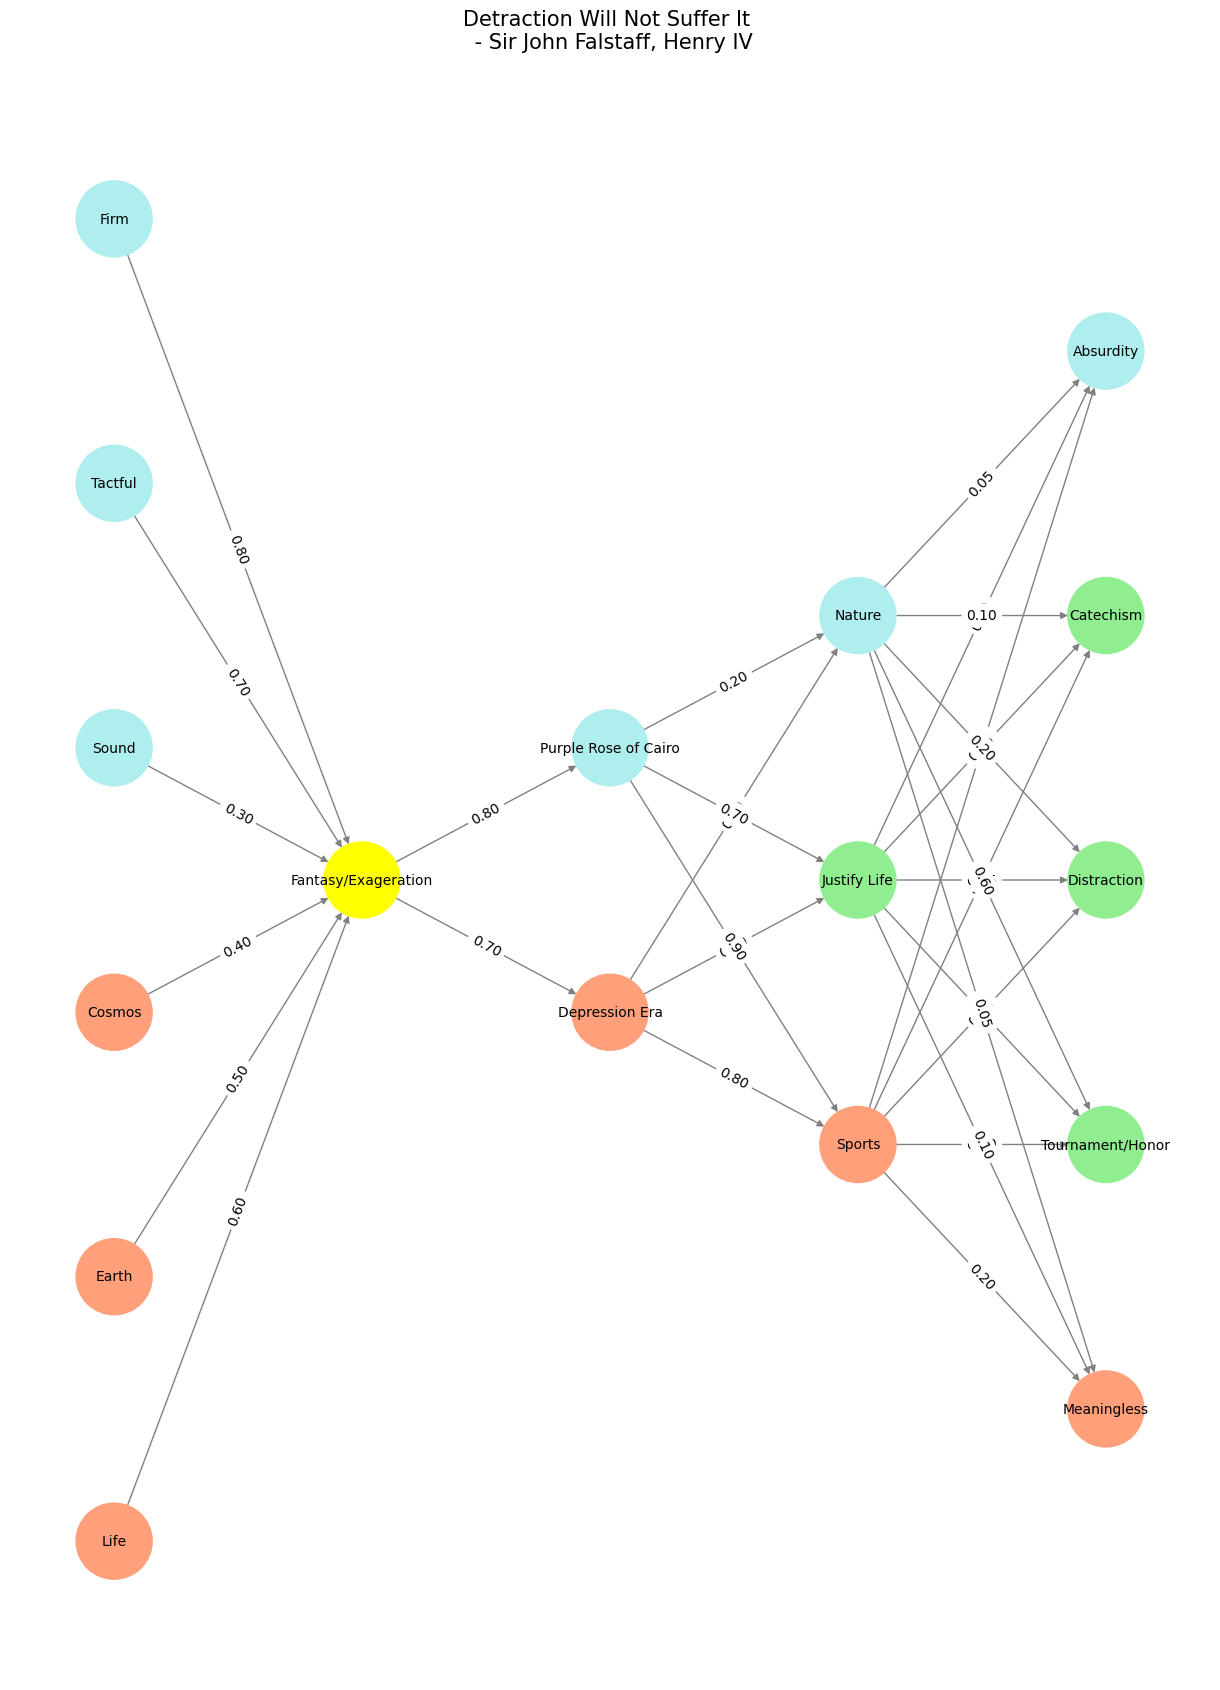

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Fantasy/Exageration'],
        'Input': ['Depression Era', 'Purple Rose of Cairo'],
        'Hidden': [
            'Sports',
            'Justify Life',
            'Nature',
        ],
        'Output': ['Meaningless', 'Tournament/Honor', 'Distraction', 'Catechism', 'Absurdity',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Fantasy/Exageration':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Purple Rose of Cairo':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Nature':
            return 'paleturquoise'
        elif node == 'Justify Life':
            return 'lightgreen'
        elif node == 'Sports':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Absurdity':
            return 'paleturquoise'
        elif node in ['Catechism', 'Distraction', 'Tournament/Honor']:
            return 'lightgreen'
        elif node == 'Meaningless':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Detraction Will Not Suffer It \n - Sir John Falstaff, Henry IV\n", fontsize=15)
    
    # Save the figure to a file
    plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} figures/blanche.*
---
width: 1
height: 1
---
Lawrence joins Academy Award-winning filmmaker Woody Allen at his screening room in New York City where Allen shares insights on his career, philosophy, education, politics and the struggle to find meaning in the universe.  Allen’s latest memoir, Apropos of Nothing, is available now. Cinematographers will not work on very sunny days -- talking of cosmos and earth node (with camera as `yellow node`)
```

Pacifists—particularly those within the American liberal tradition—misunderstand this entirely. They see the discourse, the philosophers, the thinkers, and believe civilization is born from ideas alone. They are blind to the pillars that uphold the edifice. They see only the center of *The School of Athens*, missing the profound symbolism of Athena and Apollo. They fail to grasp that the ideals they cherish are safeguarded by shields and spears wielded in their defense. Their disdain for military readiness, their refusal to accept the adversarial necessity, marks them as oblivious to the very conditions that allow their pacifism to exist.

<iframe src="https://www.youtube.com/embed/Z_3A9G4JxL0?start=720" style="width:100%;height:500px;"></iframe>

```{figure} figures/blanche.png
---
width: 1 
height: 1 
---
_What Next?_ If you follow the _School of France_ ... building from the back, ball in middle, then final decision ...  These discussions touch on sports becoming optimized for efficient outcomes instead of entertainment value where heroes, warriors, archetypes, and nodes standout like mythological characters (think: Ronaldhinho or Napoleon). The network tiki-taka is like the English-led coalition against Napoleon. Dull. But achieves its goal. 
```

To renounce the military-industrial complex in favor of pacifism is to destroy the balance upon which civilization rests. It is to abandon Athena’s shield and spear, leaving Apollo’s vision vulnerable to collapse. Civilization cannot afford such folly. Only those who fail to understand Raphael’s masterpiece—or the unbroken realities of history—can entertain such a notion.